In [1]:
(ext:chdir "~/Development/clasp/extensions/cando/src/lisp/tests/boron/" t)

-1

#### Create all paths.

In [2]:
(leap.core::clear-path)
(add-path "~/Development/clasp/extensions/cando/src/tests/boron/")
(add-path "~/Development/amber16/dat/leap/cmd/")
(add-path "~/Development/amber16/dat/leap/lib/")
(add-path "~/Development/amber16/dat/leap/parm/")
(add-path "~/Development/amber16/dat/leap/prep/")
(add-path "~/Development/amber16/dat/antechamber/")

(#P"/Users/tuj24515/Development/amber16/dat/antechamber/"
 #P"/Users/tuj24515/Development/amber16/dat/leap/prep/"
 #P"/Users/tuj24515/Development/amber16/dat/leap/parm/"
 #P"/Users/tuj24515/Development/amber16/dat/leap/lib/"
 #P"/Users/tuj24515/Development/amber16/dat/leap/cmd/"
 #P"/Users/tuj24515/Development/clasp/extensions/cando/src/tests/boron/")

In [3]:
(start-swank)

swank-loader -> /Users/tuj24515/Development/slime/swank-loader.lisp

"Read: (DEFPACKAGE :SWANK-LOADER (:USE :CL) (:EXPORT :INIT :DUMP-IMAGE :LIST-FASLS :*SOURCE-DIRECTORY* :*FASL-DIRECTORY*))
" 
"Read: (IN-PACKAGE :SWANK-LOADER)
" 
"Read: (DEFVAR *SOURCE-DIRECTORY* (MAKE-PATHNAME :NAME NIL :TYPE NIL :DEFAULTS (OR *LOAD-PATHNAME* *DEFAULT-PATHNAME-DEFAULTS*)) The directory where to look for the source.)
" 
"Read: (DEFPARAMETER *SYSDEP-FILES* (QUOTE ((SWANK CLASP) (SWANK GRAY))))
" 
"Read: (DEFPARAMETER *IMPLEMENTATION-FEATURES* (QUOTE (:ALLEGRO :LISPWORKS :SBCL :CLOZURE :CMU :CLISP :CCL :CORMAN :CORMANLISP :ARMEDBEAR :GCL :ECL :SCL :MKCL :CLASP)))
" 
"Read: (DEFPARAMETER *OS-FEATURES* (QUOTE (:MACOSX :LINUX :WINDOWS :MSWINDOWS :WIN32 :SOLARIS :DARWIN :SUNOS :HPUX :UNIX)))
" 
"Read: (DEFPARAMETER *ARCHITECTURE-FEATURES* (QUOTE (:POWERPC :PPC :X86 :X86-64 :X86_64 :AMD64 :I686 :I586 :I486 :PC386 :IAPX386 :SPARC64 :SPARC :HPPA64 :HPPA :ARM :ARMV5L :ARMV6L :ARMV7L :ARM64 :PENTIUM3 :PENTIUM4 

T

#### Load the GAFF force field and boronic ester frcmod file.

In [4]:
(clear-force-field)
(load-atom-type-rules "ATOMTYPE_GFF.DEF")

(#<FORCE-FIELD ATOMTYPE_GFF.DEF>)

In [5]:
(load-amber-params "gaff.dat")

SIMPLE-WARNING: 
Warning!  Skipping 10-12 hbond
SIMPLE-WARNING: 
Warning!  Skipping force field atom equivalences


#<FORCE-FIELD gaff.dat>

In [6]:
(load-atom-type-rules "boron.def")
(load-atom-type-rules "water.def")

(#<FORCE-FIELD water.def> #<FORCE-FIELD boron.def> #<FORCE-FIELD gaff.dat>
 #<FORCE-FIELD ATOMTYPE_GFF.DEF>)

In [7]:
(load-amber-params "frcmod.boronic-ester")
(gethash :default leap.core::*force-fields*)

(#<FORCE-FIELD frcmod.boronic-ester> #<FORCE-FIELD water.def>
 #<FORCE-FIELD boron.def> #<FORCE-FIELD gaff.dat>
 #<FORCE-FIELD ATOMTYPE_GFF.DEF>)

#### Merge force field and define parameter ff.

#### Display a prototypical aryl boronic ester.

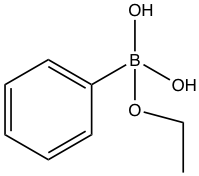

In [9]:
 (cl-jupyter-user:png-from-file "arylboronate2d.png")

#### Load the arylboronic ester from a Chemdraw file.

In [10]:
(defparameter *chemagg* (cando:load-chem-draw-aggregate "arylboronate.cdxml"))

*CHEMAGG*

In [11]:
(build-hydrogens *chemagg*)

NIL

#### Draw the 2D representation of the molecule loaded from the Chemdraw file.

In [12]:
(nglv::show-aggregate *chemagg*)

A Jupyter Widget

#### Automatically assign atom types.

In [14]:
(chem:assign-types *ff* *chemagg*)

NIL

In [15]:
(jostle *chemagg*)

NIL

#### Atomatically assign force-field parameters and minimize the energy of the molecule.

In [16]:
(energy:minimize *chemagg* :force-field *ff* :restraints-on nil)

======= Starting Steepest Descent Minimizer
---Stage-Seconds--Step-----Alpha---Dir-------------Energy-----------RMSforce
 minSDnP       0     1  0.000000   0.0              0.000          16163.819
 minSDnP       0     2  0.000367   0.0        2982336.775           8595.343
 minSDnP       0     3  0.000315   0.0        2202055.672           5972.601
DONE absolute force test:
forceRmsMag(4626.781419).LT.forceTolerance(5000.000000)
======= Starting Conjugate Gradient Minimizer
 minCGnP       0     4  0.000000   0.0              0.000           4626.781
 minCGnP       0     5  0.000388  42.7        1544025.889           4275.864
 minCGnP       0     6  0.000986  63.7         801353.244           6212.027
 minCGnP       0     7  0.000115  51.4         718935.288           2693.892
 minCGnP       0     8  0.000707  49.2         542621.797           2067.281
 minCGnP       0     9  0.000609  44.5         452335.671           1444.251
 minCGnP       0    10  0.001840  78.7         381494.459 

#<ENERGY-FUNCTION >

#### Visualize the minimized structure and demonstrate that the force field parameters lead to the construction of a chemically 

#### reasonable structure.

In [17]:
(nglv::show-aggregate *chemagg*)

A Jupyter Widget

#### Set the bounding box.

In [18]:
(chem:set-property *chemagg* :bounding-box '(30.0 30.0 30.0))

NIL

In [19]:
(chem:assign-types *ff* *chemagg*)

NIL

#### Create the topology file and coordinate file.

In [20]:
(leap.topology:save-amber-parm-format *chemagg* "boronic-ester.top" "boronic-ester.crd" *ff* :assign-types nil)

atom1: #<ATOM :C_116/:C> atom2: #<ATOM :C_114/:C> i1: 0 i2: 3
 atom1: #<ATOM :C_116/:C> atom2: #<ATOM :C_118/:C> i1: 0 i2: 6
 atom1: #<ATOM :C_116/:C> atom2: #<ATOM :H_116/:H> i1: 0 i2: 63
 atom1: #<ATOM :C_114/:C> atom2: #<ATOM :C_112/:C> i1: 3 i2: 9
 atom1: #<ATOM :C_114/:C> atom2: #<ATOM :H_114/:H> i1: 3 i2: 60
 atom1: #<ATOM :C_112/:C> atom2: #<ATOM :C_110/:C> i1: 9 i2: 18
 atom1: #<ATOM :C_112/:C> atom2: #<ATOM :H_112/:H> i1: 9 i2: 57
 atom1: #<ATOM :C_120/:C> atom2: #<ATOM :C_118/:C> i1: 12 i2: 6
 atom1: #<ATOM :C_120/:C> atom2: #<ATOM :H_120/:H> i1: 12 i2: 54
 atom1: #<ATOM :B/:B> atom2: #<ATOM :C_118/:C> i1: 15 i2: 6
 atom1: #<ATOM :C_110/:C> atom2: #<ATOM :C_120/:C> i1: 18 i2: 12
 atom1: #<ATOM :C_110/:C> atom2: #<ATOM :H_110/:H> i1: 18 i2: 51
 atom1: #<ATOM :OH/:O> atom2: #<ATOM :B/:B> i1: 21 i2: 15
 atom1: #<ATOM :OH/:O> atom2: #<ATOM :HH/:H> i1: 21 i2: 69
 atom1: #<ATOM :OH/:O> atom2: #<ATOM :B/:B> i1: 24 i2: 15
 atom1: #<ATOM :OH/:O> atom2: #<ATOM :HH/:H> i1: 24 i2: 66
 at

0

In [33]:
(defparameter *fourmeragg* (cando:load-chem-draw-aggregate "fourmer.cdxml"))

*FOURMERAGG*

In [34]:
(progn
  (defparameter *stereocenters*
    (sort (cando:gather-stereocenters *fourmeragg*) #'string< :key #'chem:get-name))
  (cando:set-stereoisomer-func *stereocenters* (constantly :S) :show t)
  (let ((quat-matcher (core:make-cxx-object 'chem:chem-info)))
    (chem:compile-smarts quat-matcher "[C&H0&D4]")
    (chem:map-atoms nil (lambda (a) (when (chem:matches quat-matcher a)
                  (chem:set-configuration a :S)
                  (format t "Set atom ~a to :S~%" (chem:get-name a))))
            *fourmeragg*)))

C_21   S
C_35   S
C_47   S
C_61   S
C_73   S
Set atom C_61 to :S
Set atom C_35 to :S
Set atom C_6 to :S


NIL

In [35]:
(chem:assign-types *ff* *fourmeragg*)

NIL

In [36]:
(jostle *fourmeragg*)

NIL

In [37]:
(defparameter *me* (energy:minimize *fourmeragg* :force-field *ff* :restraints-on t))

======= Starting Steepest Descent Minimizer
---Stage-Seconds--Step-----Alpha---Dir-------------Energy-----------RMSforce
 minSDnP       0     1  0.000000   0.0              0.000         159200.284
 minSDnP       0     2  0.000409   0.0      526462531.151          65790.945
 minSDnP       0     3  0.000395   0.0      236542453.470          42607.284
 minSDnP       0     4  0.000332   0.0      134552036.273          28358.208
 minSDnP       0     5  0.000361   0.0       85496526.654          22130.587
 minSDnP       0     6  0.000334   0.0       57874892.000          16347.637
 minSDnP       0     7  0.000374   0.0       40978241.484          13645.806
 minSDnP       0     8  0.000348   0.0       30105124.145          10641.021
 minSDnP       0     9  0.000388   0.0       22794191.175           9518.055
 minSDnP       0    10  0.000345   0.0       17732798.336           7292.643
---Stage-Seconds--Step-----Alpha---Dir-------------Energy-----------RMSforce
 minSDnP       0    11  0.000428

*ME*

In [38]:
(nglv::show-aggregate *fourmeragg*)

A Jupyter Widget

In [39]:
(chem:set-property *fourmeragg* :bounding-box '(30.0 30.0 30.0))

NIL

In [40]:
(chem:assign-types *ff* *fourmeragg*)

NIL

In [41]:
(leap.topology:save-amber-parm-format *fourmeragg* "fourmer.top" "fourmer.crd" *ff* :assign-types nil)

atom1: #<ATOM :C_153/:C> atom2: #<ATOM :C_151/:C> i1: 3 i2: 15
 atom1: #<ATOM :C_153/:C> atom2: #<ATOM :B/:B> i1: 3 i2: 0
 atom1: #<ATOM :OH/:O> atom2: #<ATOM :B/:B> i1: 6 i2: 0
 atom1: #<ATOM :OH/:O> atom2: #<ATOM :HH/:H> i1: 6 i2: 336
 atom1: #<ATOM :OH/:O> atom2: #<ATOM :B/:B> i1: 9 i2: 0
 atom1: #<ATOM :OH/:O> atom2: #<ATOM :HH/:H> i1: 9 i2: 333
 atom1: #<ATOM :O/:O> atom2: #<ATOM :B/:B> i1: 12 i2: 0
 atom1: #<ATOM :C_151/:C> atom2: #<ATOM :C_149/:C> i1: 15 i2: 24
 atom1: #<ATOM :C_151/:C> atom2: #<ATOM :H_151/:H> i1: 15 i2: 321
 atom1: #<ATOM :C_155/:C> atom2: #<ATOM :C_153/:C> i1: 18 i2: 3
 atom1: #<ATOM :C_155/:C> atom2: #<ATOM :H_155/:H> i1: 18 i2: 318
 atom1: #<ATOM :C_175/:C> atom2: #<ATOM :O/:O> i1: 21 i2: 12
 atom1: #<ATOM :C_175/:C> atom2: #<ATOM :H_1751/:H> i1: 21 i2: 309
 atom1: #<ATOM :C_175/:C> atom2: #<ATOM :H_1752/:H> i1: 21 i2: 312
 atom1: #<ATOM :C_175/:C> atom2: #<ATOM :H_1753/:H> i1: 21 i2: 315
 atom1: #<ATOM :C_149/:C> atom2: #<ATOM :C_159/:C> i1: 24 i2: 33
 ato

0

In [42]:
(progn
  (defparameter *topologyfif* (fortran:make-fortran-input-file :stream (open "fourmer.crd" :direction :input)))
  (defparameter *coords* (leap.topology::read-amber-coordinate-file *topologyfif*)))

*COORDS*

In [43]:
(chem:evaluate-energy *me* *coords*)

361.17158145412844d0

In [44]:
(chem:get-energy (chem:get-stretch-component *me*))

52.12443639177243d0

In [45]:
(chem:get-energy (chem:get-angle-component *me*))

39.17216922276258d0

In [46]:
(chem:get-energy (chem:get-dihedral-component *me*))

95.508522473823d0

In [47]:
(chem:get-energy (chem:get-nonbond-component *me*))

174.36645336577044d0

In [48]:
(load-off "tip3pfbox.off")

(:TIP3PFBOX)

In [49]:
(defparameter *wb* ~tip3pfbox)

*WB*

In [50]:
(nglv::show-aggregate ~tip3pfbox)

A Jupyter Widget

In [51]:
(print ~tip3pfbox)


AGGREGATE 

AGGREGATE

In [52]:
(defparameter *solvent* ~tip3pfbox)

*SOLVENT*

In [53]:
(defparameter *water* (chem:content-at *solvent* 0))

*WATER*

In [54]:
(chem:assign-types *ff* *solvent*)

NIL

In [55]:
(chem:map-atoms 'list (lambda (a) (chem:get-type a)) *solvent*)

(:|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow|
 :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw|
 :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw|
 :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow|
 :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw|
 :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw|
 :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow|
 :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw|
 :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw|
 :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow|
 :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw|
 :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw|
 :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|h

In [57]:
(:= *newagg* (leap.solvate::tool-solvate-and-shell *fourmeragg* *solvent* '(30.0 30.0 30.0) :shell t :farness 7.0))

Total bounding box for atom centers:  81.57681395487126d0 68.43775527478815d0 70.83701244398655d0


*NEWAGG*

In [ ]:
(leap:source "source.txt")

In [58]:
(chem:map-atoms 'list (lambda (a) (chem:get-type a)) *newagg*)

(:|b| :|c2| :|oh| :|oh| :|os| :|c2| :|c2| :|c3| :|c2| :|c2| :|c3| :|c2| :|n|
 :|c3| :|c| :|c3| :|c3| :|c| :|c3| :|o| :|c3| :|n| :|n| :|o| :|c3| :|c| :|c|
 :|c3| :|c3| :|n| :|o| :|c3| :|o| :|c3| :|c3| :|c3| :|c| :|n| :|c3| :|o| :|oh|
 :|c| :|c| :|c3| :|o| :|n| :|o| :|c3| :|c3| :|c3| :|c3| :|c3| :|c2| :|c2| :|c2|
 :|c2| :|c2| :|c2| :|b| :|oh| :|oh| :|os| :|c3| :|h1| :|h1| :|h1| :|ha| :|ha|
 :|ha| :|ha| :|hc| :|hc| :|hc| :|hc| :|h1| :|h1| :|hc| :|hc| :|hc| :|hc| :|h1|
 :|hc| :|hc| :|h1| :|h1| :|h1| :|h1| :|hc| :|hc| :|h1| :|h1| :|hc| :|hc| :|h1|
 :|h1| :|h1| :|h1| :|hc| :|hc| :|ha| :|h1| :|h1| :|ha| :|h1| :|h1| :|h1| :|ha|
 :|ha| :|ho| :|ho| :|ho| :|ho| :|ho| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow|
 :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw|
 :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw|
 :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow|
 :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :|hw| :|hw| :|ow| :

In [59]:
(leap.topology:save-amber-parm-format *newagg* "fourmer_water.top" "fourmer_water.crd" *ff* :assign-types nil)

atom1: #<ATOM :C_153/:C> atom2: #<ATOM :B/:B> i1: 3 i2: 0
 atom1: #<ATOM :OH/:O> atom2: #<ATOM :B/:B> i1: 6 i2: 0
 atom1: #<ATOM :OH/:O> atom2: #<ATOM :B/:B> i1: 9 i2: 0
 atom1: #<ATOM :O/:O> atom2: #<ATOM :B/:B> i1: 12 i2: 0
 atom1: #<ATOM :C_151/:C> atom2: #<ATOM :C_153/:C> i1: 15 i2: 3
 atom1: #<ATOM :C_155/:C> atom2: #<ATOM :C_153/:C> i1: 18 i2: 3
 atom1: #<ATOM :C_175/:C> atom2: #<ATOM :O/:O> i1: 21 i2: 12
 atom1: #<ATOM :C_149/:C> atom2: #<ATOM :C_151/:C> i1: 24 i2: 15
 atom1: #<ATOM :C_157/:C> atom2: #<ATOM :C_155/:C> i1: 27 i2: 18
 atom1: #<ATOM :C_105/:C> atom2: #<ATOM :C_149/:C> i1: 30 i2: 24
 atom1: #<ATOM :C_159/:C> atom2: #<ATOM :C_149/:C> i1: 33 i2: 24
 atom1: #<ATOM :C_159/:C> atom2: #<ATOM :C_157/:C> i1: 33 i2: 27
 atom1: #<ATOM :C_159/:C> atom2: #<ATOM :H_159/:H> i1: 33 i2: 297
 atom1: #<ATOM :N/:N> atom2: #<ATOM :C_105/:C> i1: 36 i2: 30
 atom1: #<ATOM :C_61/:C> atom2: #<ATOM :N/:N> i1: 39 i2: 36
 atom1: #<ATOM :C_71/:C> atom2: #<ATOM :N/:N> i1: 42 i2: 36
 atom1: #<ATO

0

In [60]:
(defparameter *newene* (energy:minimize *newagg* :force-field *ff* :restraints-on t))

======= Starting Steepest Descent Minimizer
DONE absolute force test:
forceRmsMag(5.015416).LT.forceTolerance(5000.000000)
======= Starting Conjugate Gradient Minimizer
---Stage-Seconds--Step-----Alpha---Dir-------------Energy-----------RMSforce
 minCGnP       0     1  0.000000   0.0              0.000              5.015
 minCGnP       0     2  0.000821  31.7            159.291              3.103
 minCGnP       0     3  0.001265  44.8            143.106              2.594
 minCGnP       0     4  0.000590  35.9            137.822              1.314
 minCGnP       0     5  0.000724  44.9            136.158              1.058
 minCGnP       0     6  0.001300  56.4            134.221              1.132
 minCGnP       0     7  0.001007  63.4            132.503              1.249
 minCGnP       0     8  0.000964  62.3            130.502              1.065
 minCGnP       0     9  0.001009  60.3            128.981              0.862
 minCGnP       0    10  0.001140  64.4            127.853    

*NEWENE*

In [61]:
(chem:get-energy (chem:get-stretch-component *newene*))

51.45688143717101d0

In [62]:
(chem:get-energy (chem:get-angle-component *newene*))

39.8460829942338d0

In [63]:
(chem:get-energy (chem:get-dihedral-component *newene*))

94.11042564392181d0

In [64]:
(chem:get-energy (chem:get-nonbond-component *newene*))

-157.38320181164997d0

In [65]:
(nglv:show-aggregate *newagg*)

A Jupyter Widget

In [47]:
(chem:map-atoms nil (lambda (r) (print r)) *solvent*)


#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O> 
#<ATOM :H1/:H> 
#<ATOM :H2/:H> 
#<ATOM :O/:O

NIL

In [14]:
(chem:map-residues nil (lambda (r) (print r)) ~tip3pfbox)


#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WAT> 
#<RESIDUE :WA

NIL

In [29]:
(defparameter *cat* (cando:load-chem-draw-aggregate "spiroligomer transglycosylase copy.cdxml"))

SIMPLE-ERROR: 
Could not find file spiroligomer transglycosylase copy.cdxml


NIL